## Variedades y color de la calabaza

Cargue las bibliotecas y el conjunto de datos necesarios. Convierta los datos en una trama de datos que contenga un subconjunto de los datos: 

Veamos la relación entre el color y la variedad

In [1]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../Data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Regresión logística para predecir categorías

Una de las técnicas básicas clásicas de aprendizaje automático, echaremos un vistazo a la regresión logística. Usarás esta técnica para descubrir patrones que predigan categorías binarias. ¿Este dulce es un chocolate o no lo es? ¿Ésta enfermedad es contagiosa o no?, ¿Este cliente eligirá este producto o no?


Haber trabajado con los datos de calabazas, ahora estamos suficientemente familiarizados con estos para entender que hay una categoría binaria que podemos trabajar como el `Color`.

Construyamos un modelo de regresión logística para predecirlo, dadas algunas variables, qué color podría tener una calabaza dada (naranja 🎃 o blanca 👻).

Define la hipotesis
Para nuestros propósitos, expresaremos esto como un binario: 'Orange' o 'Not Orange'. También hay una categoría 'striped' en nuestro conjunto de datos pero hay menos instancias de éstas, por lo que no las usaremos. Ésta desaparece una vez que removemos los valores nulos de nuestro conjunto de datos, de cualquier forma.

🎃 Dato en Norte America llaman 'fantasmas' a las calabazas blancas. No son muy fáciles de tallar, por lo que no son tan populares como las calabazas naranjas.

### Clasificación binaria
La regresión logística no ofrece las mismas características como la regresión lineal. Las primeras ofrecen una predicción acerca de categorías binarias ("naranja o no naranja") mientras que la segunda es capaz de predecir valores continuos, por ejemplo dado el origen de una calabaza y el tiempo de cosecha o cuánto incrementará su precio.

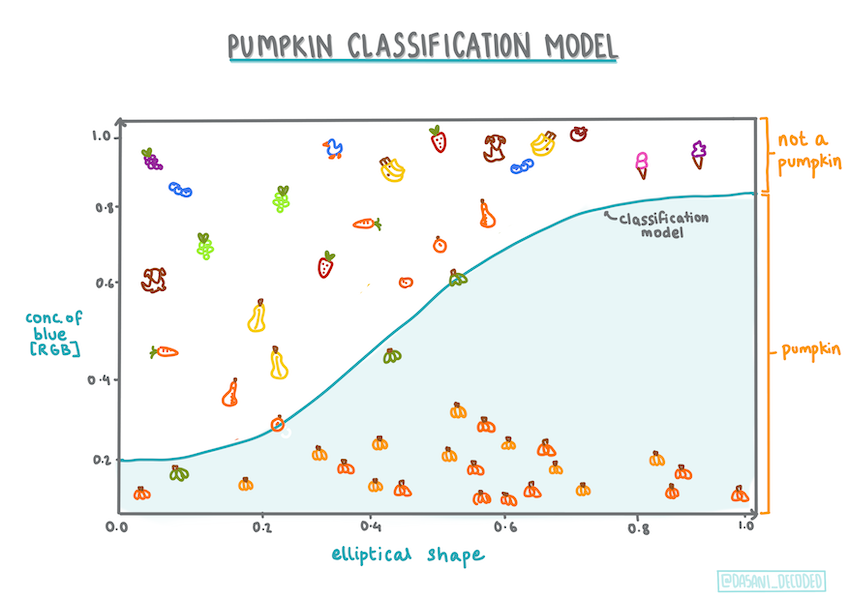

### Otras clasificaciones
Existen otros tipo de regresión logística, incluyendo la multinomial y ordinal:

- Multinomial, la cual implica tener más de una categoría - "Orange, White, and Striped".
- Ordinal, la cual implica categorías ordenadas, útil si quisieramos ordenar nuestras resultados logicamente, como nuestras calabazas que están ordenadas por un número finito de tamaños (mini,sm,med,lg,xl,xxl).

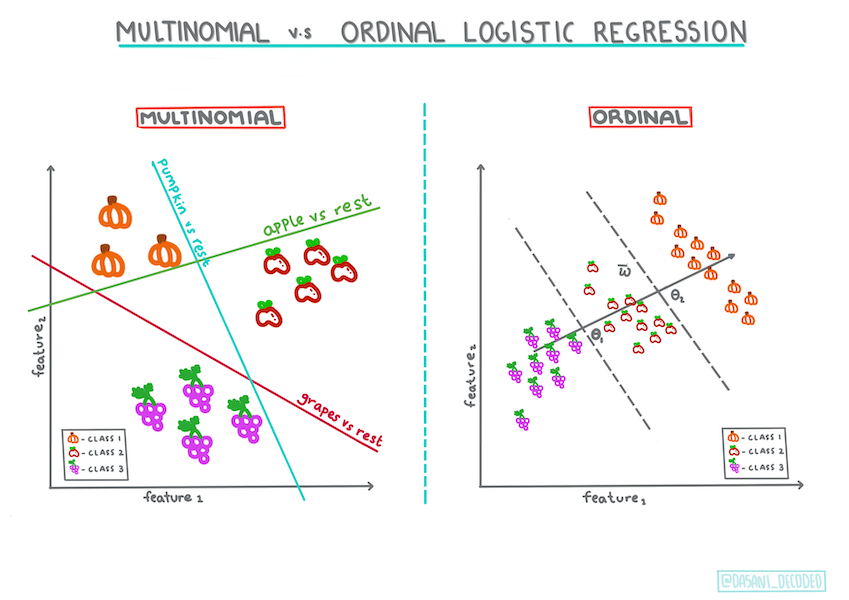

### Sigue siendo lineal
Aunque este tipo de regresión se trata de 'predicciones de categoría', aún funciona mejor cuando hay una relación clara entre la variable dependiente (color) y las otras variables independientes (el resto del conjunto de datos, como el nombre de la ciudad y tamaño). Es bueno tener una idea de si hay alguna linealidad dividiendo estas variables o no.

## Ejercicio - arregla los datos

Limpiamos los datos un poco, removemos los valores nulos y selecciona sólo algunas de las columnas:

In [2]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = full_pumpkins.drop([c for c in full_pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City Name  991 non-null    int32
 1   Package    991 non-null    int32
 2   Variety    991 non-null    int32
 3   Origin     991 non-null    int32
 4   Item Size  991 non-null    int32
 5   Color      991 non-null    int32
dtypes: int32(6)
memory usage: 31.0 KB


### Visualización - cuadrícula lado a lado

Hemos cargado el starter notebook con datos de calabazas una vez más y los hemos limpiado para así preservar el conjunto de datos que contiene unas pocas variables, incluyendo `Color`. Visualizaremos el dataframe en el notebook usando una librería diferente: Seaborn, el cual es construido en Matplotlib.

Seaborn ofrece algunas formas ingeniosas de visualizar tus datos. Por ejemplo, se puede comparar distribuciones de los datos para cada punto en una cuadrícula lado a lado.

1. Creamos dicha cuadrícula instanciando PairGrid, usando nuestros datos de calabazas new_pumpkins, seguido de la llamada a map():

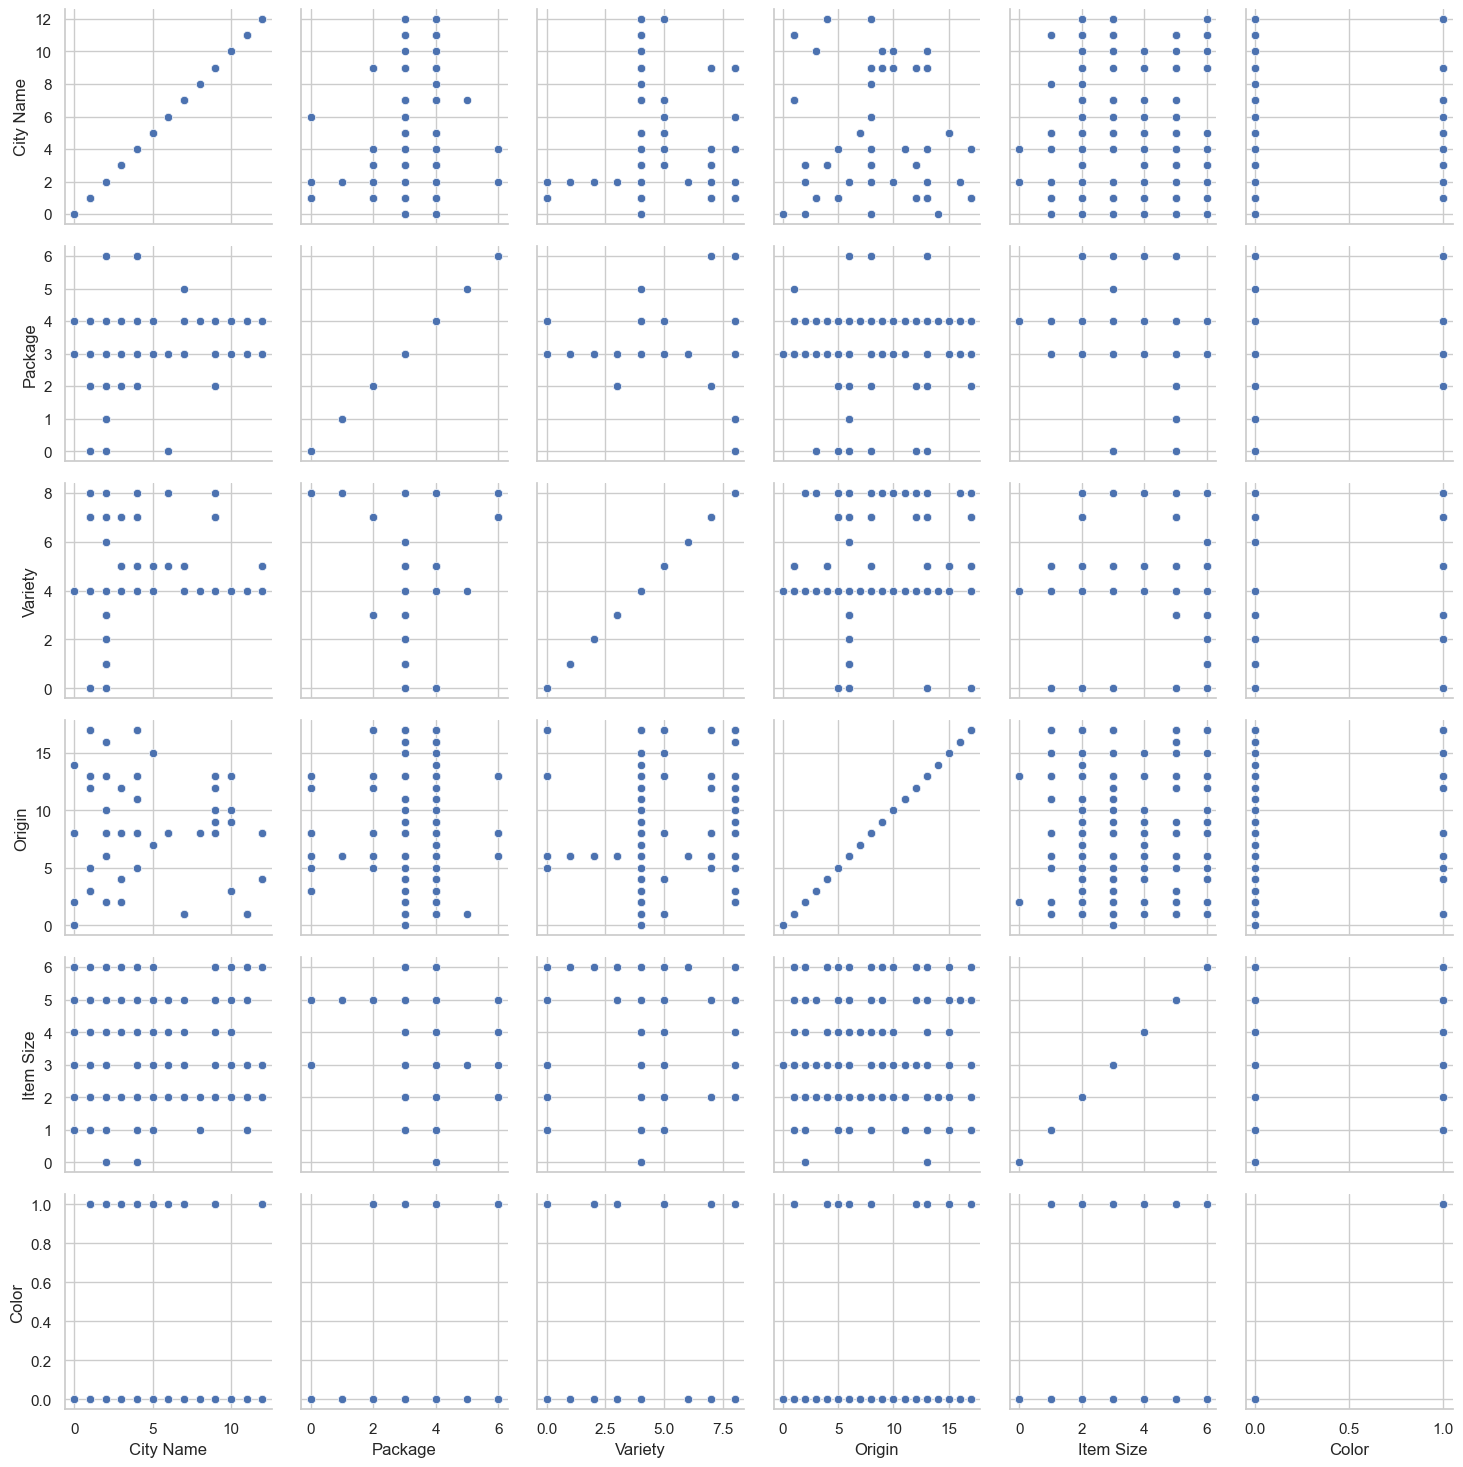

In [3]:
import seaborn as sns

sns.set_theme(style="whitegrid")
g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

Al observar los datos lado a lado, podemos observar como los datos de Color se relacionan con las otras columnas.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


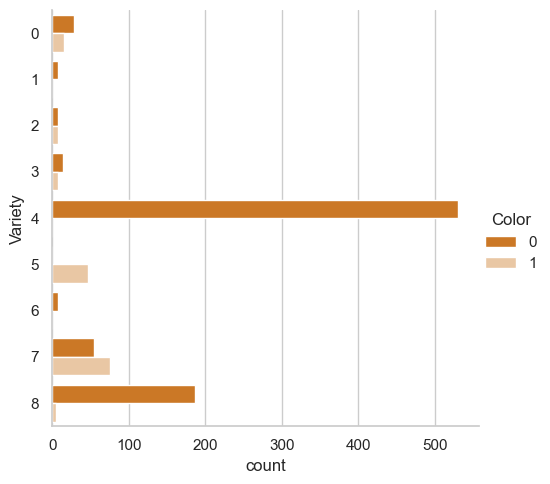

In [19]:
g= sns.catplot(data=new_pumpkins, y="Variety", hue="Color", kind="count", palette=["#e6780a","#f5c798"])

Al observar los datos, puede ver cómo se relacionan los datos de Color con la Variedad.

### Usa un gráfico de enjambre
Dado que Color es una categoría binaria (Naranja o no), se le llaman 'datos categóricos' y necesita 'un enfoque más especializado para visualización. Hay otras formas de visualizar las relaciones de esta categoría con otras variables.

Puedes visualizar variables lado a lado con los gráficos Seaborn.

Cree un gráfico de 'enjambre' (swarm) para mostrar la distribución de valores:

C:\Users\HP\AppData\Local\Temp\ipykernel_10284\2542922534.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins, palette=["#e6780a","#f5c798"])
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


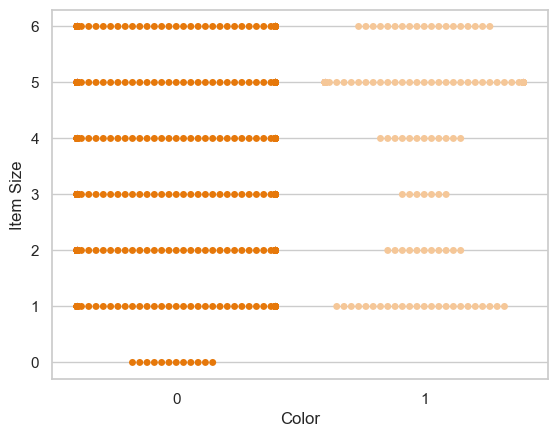

In [20]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins, palette=["#e6780a","#f5c798"])

### Gráfico de Violín
Un gráfico tipo 'violín' es útil ya que se puede visualizar fácilmente la forma en que los datos se distribuyen en las dos categorías. Los gŕaficos de violín no funcionan muy bien con conjuntos de datos muy pequeños ya que la distribución se muestra más 'suavemente'.

Como parámetros `x=Color`, `kind="violin"` y llamada `catplot()`:

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


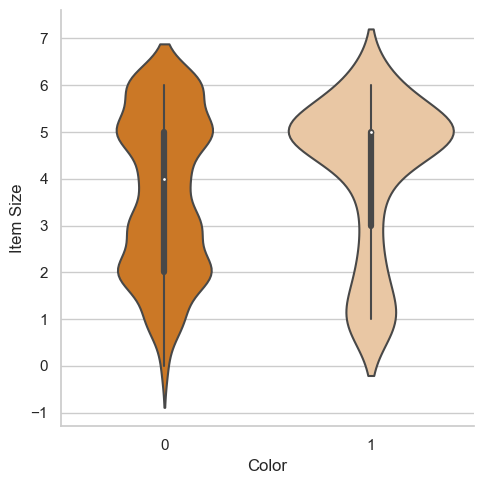

In [21]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins, palette=["#e6780a","#f5c798"])

 Tenemos una idea de la relación entre las categorías binarias de color y el grupo mayor de tamaños, exploremos la regresión logística para determinar el color probable de cierta calabaza.

### Construye tu modelo
Construir un modelo para encontrar estas clasificaciones binarias es sorprendentemente fácil en Scikit-learn.

1. Elige las variable que quieres usar en tu modelo de clasificación y divide el modelo y los conjuntos de pruebas llamando train_test_split():

In [6]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

2. Ahora puedes entrenar tu modelo, llamando fit() con tus datos entrenados, e imprimir su resultado:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


Este es el marcador del modelo. No es tan malo, considerando se tiene solo 1000 filas de datos.

### Mejor comprensión a través e una matriz de confusión
Mientras puedes obtener un reporte de términos del marcador imprimiendo los elementos de arriba, serás capaz de entender tu modelo más fácilmente usando una matriz de confusión para ayudarnos a entender cómo se desempeña el modelo.

1. Para usar métricas de confusión, llama confusion_matrix():

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]], dtype=int64)

En Scikit-learn, las filas de las matriaces de confusión (eje 0) son etiquetas reales y las columnas (eje 1) son etiquetas previstas.

0	1
0	TN	FP
1	FN	TP

¿Qué pasa aquí? Digamos que se le pidió a tu modelo clasificar las calabaas entre dos categorías binarias, la categoría 'orange' y la categoría 'not-orange'.

Si el modelo predice una calabaza como no naranja y esta pertenece a la categoría 'not-orange' en realidad la llamamos como un verdadero negativo, mostrado por el número superior izquierdo.
Si tu modelo precice una calabaza como naranja y esta pertenece a la categoría 'not-orange' en realidad la llamamos como un falso negativo, mostrado por el número inferior izquierdo.
Si tu modelo predice una calabaza como no naranja y este pertenece a la categoría 'orange' en realidad la llamamos como un falso positivo, mostrado por el número superior derecho.
Si tu modelo predice una calabaza como naranja y esta pertenece a la categoría 'naranja' en realidad la llamamos como un verdadero positivo, mostrado por el número inferior derecho.
Como habrás adivinado, es preferible tener un número mayor de verdaderos positivos y verdaderos negativos, y un número menor de falsos positivos y falsos negativos, lo cual implica que el modelo se desempeña mejor.

¿Cómo se relaciona la matriz de confusión con precision (precisión) y recall (recuerdo)? Recuerda, el reporte de clasificación impreso arriba mostró precisión (0.83) y recuerdo (0.98).

Precision = tp / (tp + fp) = 162 / (162 + 33) = 0.8307692307692308

Recall = tp / (tp + fn) = 162 / (162 + 4) = 0.9759036144578314

### Visualiza la curva ROC de este modelo
Este no es un mal modelo; su precisión está en el rango de 80% ya que idealmente puedes usarlo para precedir el color de una calabaza dado un conjunto de variables.

Hagamos una visualización más para ver el así llamado puntaje 'ROC':

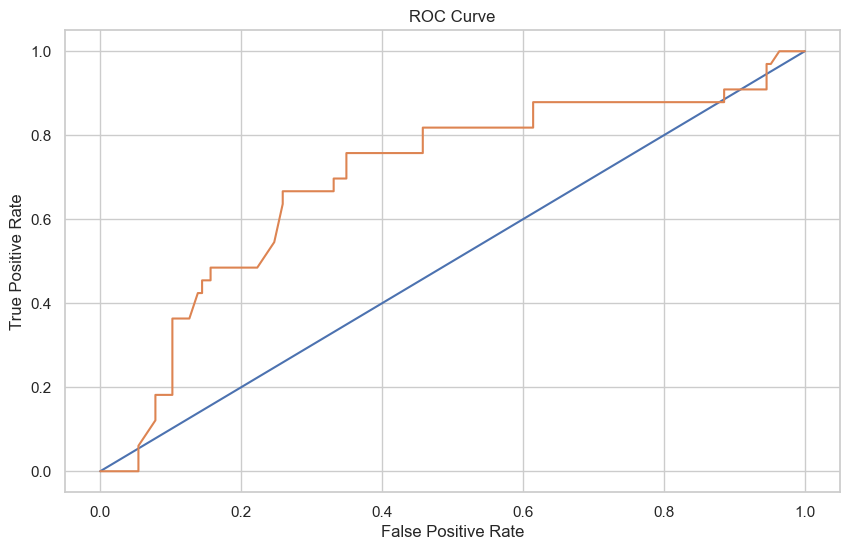

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Usando de nuevo Seaborn, grafica la característica operativa de recepción del modelo o ROC. Las curvas ROC curves son usadas comúnmente para obtener una vista de la salida de un clasificador en términos de sus verdaderos positivos vs falsos positivos. "Las curvas ROC presentan típicamente la tasa de verdaderos positivos en el eje Y, y la tasa falsos positivos en el eje X." Así, la inclinación de la curva y el espeacio entre la línea del punto medio y la curva importan: quieres una curva que suba rápidamente y sobre la línea. En nuestro caso, hay falsos positivos para empezar, y luego la línea sube hacía arriba y continua propiamente

Finalmente, usa la API roc_auc_score de Scikit-learn para calcular el 'Área bajo la curva' real (AUC):

In [27]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748


El resultado es `0.6976998904709748`. Dado que la AUC varía entre 0 y 1, quieres un puntaje grande, ya que un modelo que es 100% correcto en sus predicciones tendrá un AUC de 1; en este caso el modelo es bastante bueno.